In [ ]:
# Pre-processing
# Bags of words
# Tf-idf
# Build the model and evaluate the performance

In [2]:
!pip install contractions

   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   --------- ------------------------------ 71.7/289.9 kB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 225.3/289.9 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------  286.7/289.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 289.9/289.9 kB 2.2 MB/s eta 0:00:00


In [84]:
import numpy as np
import pandas as pd
import re,string,unicodedata
# Regex: kunal.shukla@gmail.com, it is used for extracting the first and last name
# string
# unicodedata
import contractions
# contractions: I've --> I have
from bs4 import BeautifulSoup
# BeautifulSoup:
import nltk
# nltk: Natural language tool-kit
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Words such as I, am, the, a, but, or, etc
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
# word_tokenize
# sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
# It is use for conerting words of different tense into one word. Ran, running will be converted to run.
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


In [27]:
data=pd.read_csv('Tweets.csv')
data.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
6773,570287886135918593,neutral,1.0000,NaN,NaN,Delta,NaN,DaniP0915,NaN,0,"@JetBlue flying w/ infant for the 1st time, ca...",NaN,2015-02-24 10:23:22 -0800,"ÜT: 40.907502,-73.85468",Quito
244,569180623165915137,positive,0.6771,NaN,NaN,Virgin America,NaN,InuAtah,NaN,0,"@VirginAmerica classiq, luv Virgin America. Gr...",NaN,2015-02-21 09:03:30 -0800,Abuja,NaN
12252,570250940290342914,negative,0.6866,Lost Luggage,0.3520,American,NaN,Kukirani,NaN,0,@AmericanAir hi we have lost and found solutio...,NaN,2015-02-24 07:56:33 -0800,Worldwide,NaN
4842,569685259412836354,negative,1.0000,Customer Service Issue,0.6362,Southwest,NaN,bmeshoulam,NaN,0,@SouthwestAir Tough I can take. Zero meaningfu...,NaN,2015-02-22 18:28:44 -0800,"Cambridge, MA",Atlantic Time (Canada)
12219,570259700937134080,neutral,0.7068,NaN,0.0000,American,NaN,Jacqueline062,NaN,0,“@AmericanAir: Bet these birds wish they'd flo...,NaN,2015-02-24 08:31:22 -0800,"Dallas, Texas",Central Time (US & Canada)


In [11]:
data.shape

(14640, 15)

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


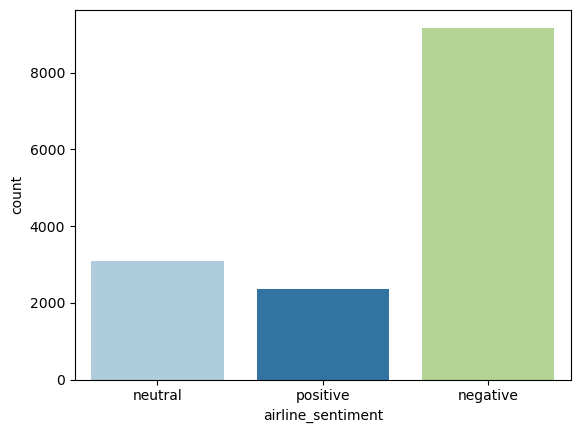

In [33]:
sns.countplot(data,x='airline_sentiment',palette='Paired')
plt.show()

<Axes: xlabel='airline'>

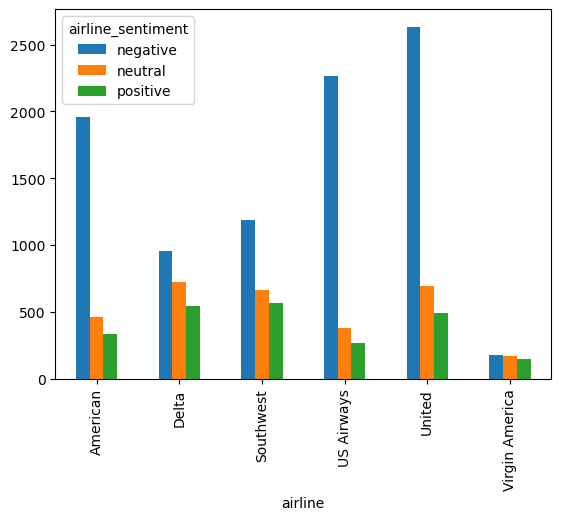

In [42]:
# Airline sentiment summary

airline_sentiment=data.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
# This first group the data based on airlines and then each airline based on airline_sentiments. airline_sentiment.counts() 
# counts the value for each of the mentioned category.unstack() converts the second column i.e airline_sentiment into column headings
# converting it into a dataframe.

airline_sentiment.plot(kind='bar')

In [70]:
neg_reasons=pd.DataFrame(data.negativereason.value_counts()).reset_index()
neg_reasons

,negativereason,count
0,Customer Service Issue,2910
1,Late Flight,1665
2,Can't Tell,1190
3,Cancelled Flight,847
4,Lost Luggage,724
5,Bad Flight,580
6,Flight Booking Problems,529
7,Flight Attendant Complaints,481
8,longlines,178
9,Damaged Luggage,74


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


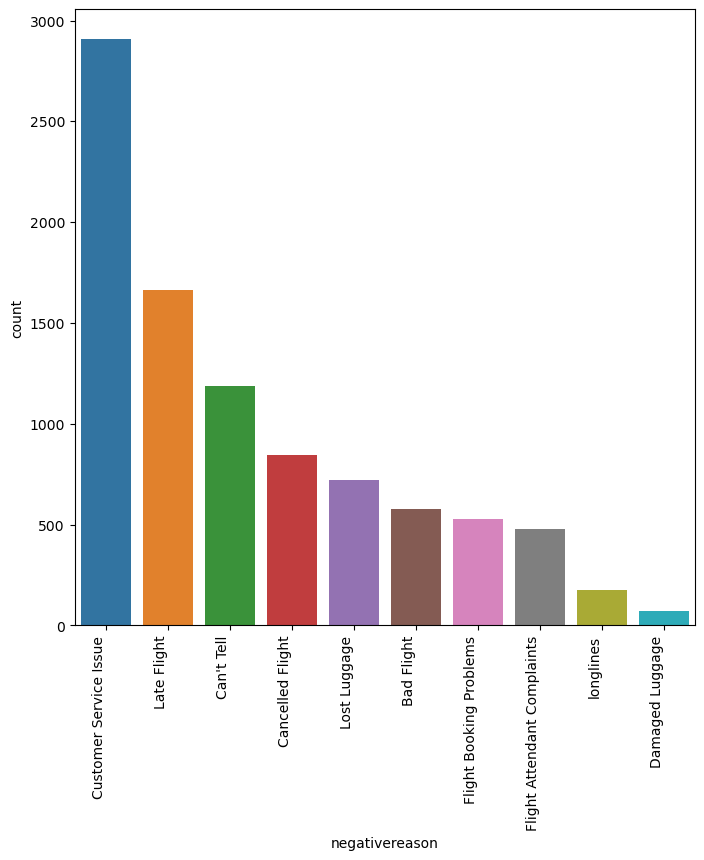

In [82]:
plt.figure(figsize=(8,8))
# sns.bar(neg_reasons['negativereason'], neg_reasons['count'])  # No double square brackets here
sns.barplot(x=neg_reasons['negativereason'],y=neg_reasons['count'])
plt.xticks(rotation=90, ha='right')
plt.show()

In [87]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

In [104]:
airline_tweets=data[data['airline_sentiment']=='negative']
words=' '.join(data['text'])
# words.split()

cleaned_word =" ".join([word for word in words.split()
                           if 'http' not in word
                               and not word.startswith('@')
                               and not word.startswith('&')
                               and not word.startswith(':')
                               and word != 'RT'
                          ])

In [116]:
48+15

63